In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression

# Read the CSV file.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EWU_Study/CSE303/DMIM/Labs/Lab 8/Lab Task/diabetes_data.csv')
display(df)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


# Check for the null values and handle them.

In [ ]:
df.isnull().sum()

,0
Age,25
Gender,16
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
np.sort(df['Age'].unique())

array([16., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.,
       37., 38., 39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.,
       50., 51., 52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62.,
       63., 64., 65., 66., 67., 68., 69., 70., 72., 79., 85., 90., nan])

In [ ]:
age_mean = df['Age'].mean()
age_mean_roundup = round(age_mean, 0)
print(age_mean_roundup)

age_median = df['Age'].median()
print(age_median)

48.0
47.0


In [ ]:
df_copy = df.copy()
df_copy['Age'] = df_copy['Age'].fillna(age_mean_roundup)
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy.isnull().sum()

,0
Age,0
Gender,16
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,319
Female,185


In [ ]:
gender_mode = df['Gender'].mode()[0]
print(gender_mode)

Male


In [ ]:
df_copy['Gender'] = df_copy['Gender'].fillna(gender_mode)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


In [ ]:
df['muscle stiffness'][df.isnull().any(axis=1)]

,muscle stiffness
12,No
13,No
14,No
15,Yes
16,Yes
...,...
483,No
484,No
485,No
486,No


In [ ]:
df['muscle stiffness'].unique()

array(['Yes', 'No', nan], dtype=object)

In [ ]:
df['muscle stiffness'].value_counts()

,count
muscle stiffness,
No,306
Yes,185


In [ ]:
muscle_stiffness_mode = df['muscle stiffness'].mode()[0]
print(muscle_stiffness_mode)

No


In [ ]:
df_copy['muscle stiffness'] = df_copy['muscle stiffness'].fillna(muscle_stiffness_mode)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy.isnull().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


# Identify the unique values in categorical columns and map them accordingly.


In [ ]:
df_copy['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df_copy['Gender'].value_counts()

,count
Gender,
Male,335
Female,185


In [ ]:
gender_mapping = {
    'Male': 1,
    'Female': 2,
}

df_copy['Gender'] = df_copy['Gender'].map(gender_mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,1,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,1,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,1,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,1,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,2,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,2,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,2,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy['Polyuria'].value_counts()

,count
Polyuria,
No,262
Yes,258


In [ ]:
Polyuria = {"Yes":1,"No":0}

df_copy['Polyuria'] = df_copy['Polyuria'].map(Polyuria)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,1,0,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,1,1,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,1,0,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,1,1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,2,1,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,2,1,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,2,0,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy['Polydipsia'].value_counts()

,count
Polydipsia,
No,287
Yes,233


In [ ]:
df_copy['Polydipsia'] = df_copy['Polydipsia'].map({ "Yes": 1, "No": 0})
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,1,0,0,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,1,1,0,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,1,0,0,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,1,1,1,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,2,1,1,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,2,1,1,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,2,0,0,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
mapping = { "Yes":1, "No": 0}

In [ ]:
df_copy["sudden weight loss"].value_counts()

,count
sudden weight loss,
No,303
Yes,217


In [ ]:
df_copy["sudden weight loss"] = df_copy["sudden weight loss"].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,1,0,0,0,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,1,1,0,0,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,1,0,0,1,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,1,1,1,1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,2,1,1,1,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,2,1,1,1,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,2,0,0,0,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy['weakness'].value_counts()

,count
weakness,
Yes,305
No,215


In [ ]:
df_copy['weakness'] = df_copy['weakness'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,1,0,0,0,1,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,1,1,0,0,1,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,1,0,0,1,1,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,1,1,1,1,1,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,2,1,1,1,1,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,2,1,1,1,1,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,2,0,0,0,1,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy['Polyphagia'].value_counts()

,count
Polyphagia,
No,283
Yes,237


In [ ]:
df_copy['Polyphagia'] = df_copy['Polyphagia'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,1,0,0,0,1,0,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,1,1,0,0,1,1,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,1,0,0,1,1,1,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,1,1,1,1,1,1,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,2,1,1,1,1,1,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,2,1,1,1,1,1,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,2,0,0,0,1,0,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy['Genital thrush'].value_counts()

,count
Genital thrush,
No,404
Yes,116


In [ ]:
df_copy['Genital thrush'] = df_copy['Genital thrush'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,1,0,0,0,1,0,0,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41.0,1,1,0,0,1,1,0,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,1,0,0,1,1,1,1,No,Yes,No,Yes,No,No,No,No,Positive
4,60.0,1,1,1,1,1,1,0,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,0,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,2,1,1,1,1,1,0,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,2,1,1,1,1,1,0,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,2,0,0,0,1,0,0,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy['visual blurring'].value_counts()

,count
visual blurring,
No,287
Yes,233


In [ ]:
df_copy['visual blurring'] = df_copy['visual blurring'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,1,0,0,0,1,0,0,1,No,No,No,Yes,No,Yes,No,Positive
2,41.0,1,1,0,0,1,1,0,0,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45.0,1,0,0,1,1,1,1,0,Yes,No,Yes,No,No,No,No,Positive
4,60.0,1,1,1,1,1,1,0,1,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,0,0,Yes,No,Yes,Yes,No,No,No,Positive
516,48.0,2,1,1,1,1,1,0,0,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58.0,2,1,1,1,1,1,0,1,No,No,No,Yes,Yes,No,Yes,Positive
518,32.0,2,0,0,0,1,0,0,1,Yes,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy['Itching'].value_counts()

,count
Itching,
No,267
Yes,253


In [ ]:
df_copy['Itching'] = df_copy['Itching'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,No,Yes,No,Yes,Yes,Yes,Positive
1,58.0,1,0,0,0,1,0,0,1,0,No,No,Yes,No,Yes,No,Positive
2,41.0,1,1,0,0,1,1,0,0,1,No,Yes,No,Yes,Yes,No,Positive
3,45.0,1,0,0,1,1,1,1,0,1,No,Yes,No,No,No,No,Positive
4,60.0,1,1,1,1,1,1,0,1,1,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,0,0,1,No,Yes,Yes,No,No,No,Positive
516,48.0,2,1,1,1,1,1,0,0,1,Yes,Yes,Yes,No,No,No,Positive
517,58.0,2,1,1,1,1,1,0,1,0,No,No,Yes,Yes,No,Yes,Positive
518,32.0,2,0,0,0,1,0,0,1,1,No,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy['Irritability'].value_counts()

,count
Irritability,
No,394
Yes,126


In [ ]:
df_copy['Irritability'] = df_copy['Irritability'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,Yes,No,Yes,Yes,Yes,Positive
1,58.0,1,0,0,0,1,0,0,1,0,0,No,Yes,No,Yes,No,Positive
2,41.0,1,1,0,0,1,1,0,0,1,0,Yes,No,Yes,Yes,No,Positive
3,45.0,1,0,0,1,1,1,1,0,1,0,Yes,No,No,No,No,Positive
4,60.0,1,1,1,1,1,1,0,1,1,1,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,0,0,1,0,Yes,Yes,No,No,No,Positive
516,48.0,2,1,1,1,1,1,0,0,1,1,Yes,Yes,No,No,No,Positive
517,58.0,2,1,1,1,1,1,0,1,0,0,No,Yes,Yes,No,Yes,Positive
518,32.0,2,0,0,0,1,0,0,1,1,0,Yes,No,No,Yes,No,Negative


In [ ]:
df_copy['delayed healing'].value_counts()

,count
delayed healing,
No,281
Yes,239


In [ ]:
df_copy['delayed healing'] = df_copy['delayed healing'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,No,Yes,Yes,Yes,Positive
1,58.0,1,0,0,0,1,0,0,1,0,0,0,Yes,No,Yes,No,Positive
2,41.0,1,1,0,0,1,1,0,0,1,0,1,No,Yes,Yes,No,Positive
3,45.0,1,0,0,1,1,1,1,0,1,0,1,No,No,No,No,Positive
4,60.0,1,1,1,1,1,1,0,1,1,1,1,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,0,0,1,0,1,Yes,No,No,No,Positive
516,48.0,2,1,1,1,1,1,0,0,1,1,1,Yes,No,No,No,Positive
517,58.0,2,1,1,1,1,1,0,1,0,0,0,Yes,Yes,No,Yes,Positive
518,32.0,2,0,0,0,1,0,0,1,1,0,1,No,No,Yes,No,Negative


In [ ]:
df_copy['partial paresis'].value_counts()

,count
partial paresis,
No,296
Yes,224


In [ ]:
df_copy['partial paresis'] = df_copy['partial paresis'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,Yes,Yes,Yes,Positive
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,No,Yes,No,Positive
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,Yes,Yes,No,Positive
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,No,No,No,Positive
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,0,0,1,0,1,1,No,No,No,Positive
516,48.0,2,1,1,1,1,1,0,0,1,1,1,1,No,No,No,Positive
517,58.0,2,1,1,1,1,1,0,1,0,0,0,1,Yes,No,Yes,Positive
518,32.0,2,0,0,0,1,0,0,1,1,0,1,0,No,Yes,No,Negative


In [ ]:
df_copy['muscle stiffness'].value_counts()

,count
muscle stiffness,
No,335
Yes,185


In [ ]:
df_copy['muscle stiffness'] = df_copy['muscle stiffness'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,Yes,Yes,Positive
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,Yes,No,Positive
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,Yes,No,Positive
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,No,No,Positive
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,0,0,1,0,1,1,0,No,No,Positive
516,48.0,2,1,1,1,1,1,0,0,1,1,1,1,0,No,No,Positive
517,58.0,2,1,1,1,1,1,0,1,0,0,0,1,1,No,Yes,Positive
518,32.0,2,0,0,0,1,0,0,1,1,0,1,0,0,Yes,No,Negative


In [ ]:
df_copy['Alopecia'].value_counts()

,count
Alopecia,
No,341
Yes,179


In [ ]:
df_copy['Alopecia'] = df_copy['Alopecia'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,Yes,Positive
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,No,Positive
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,No,Positive
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,No,Positive
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,0,0,1,0,1,1,0,0,No,Positive
516,48.0,2,1,1,1,1,1,0,0,1,1,1,1,0,0,No,Positive
517,58.0,2,1,1,1,1,1,0,1,0,0,0,1,1,0,Yes,Positive
518,32.0,2,0,0,0,1,0,0,1,1,0,1,0,0,1,No,Negative


In [ ]:
df_copy['Obesity'].value_counts()

,count
Obesity,
No,432
Yes,88


In [ ]:
df_copy['Obesity'] = df_copy['Obesity'].map(mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Positive
516,48.0,2,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Positive
517,58.0,2,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Positive
518,32.0,2,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Negative


In [ ]:
df_copy['class'].value_counts()

,count
class,
Positive,320
Negative,200


In [ ]:
Mapping = { "Positive":1, "Negative":0 }

df_copy['class'] = df_copy['class'].map(Mapping)
display(df_copy)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40.0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58.0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41.0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45.0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60.0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39.0,2,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48.0,2,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58.0,2,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32.0,2,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


#Display the correlation matrix.

In [ ]:
Correlation = df_copy.corr()
Correlation

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,-0.061079,0.196853,0.136736,0.063170,0.231319,0.310966,0.099381,0.410396,0.295388,0.209509,0.258008,0.235102,0.324636,0.318697,0.129672,0.104953
Gender,-0.061079,1.000000,0.250755,0.291644,0.259027,0.118197,0.207142,-0.195575,0.210869,0.056180,0.010997,0.096489,0.310750,0.093828,-0.310136,0.007417,0.430617
Polyuria,0.196853,0.250755,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.130244,-0.144192,0.126567,0.665922
Polydipsia,0.136736,0.291644,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.178559,-0.310964,0.098691,0.648734
sudden weight loss,0.063170,0.259027,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.096107,-0.202727,0.169294,0.436568
weakness,0.231319,0.118197,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.265021,0.090490,0.045665,0.243275
Polyphagia,0.310966,0.207142,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.311993,-0.053498,0.029785,0.342504
Genital thrush,0.099381,-0.195575,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.108735,0.204847,0.053828,0.110288
visual blurring,0.410396,0.210869,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.428961,0.014604,0.109005,0.251300
Itching,0.295388,0.056180,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.224951,0.266506,0.001894,-0.013384


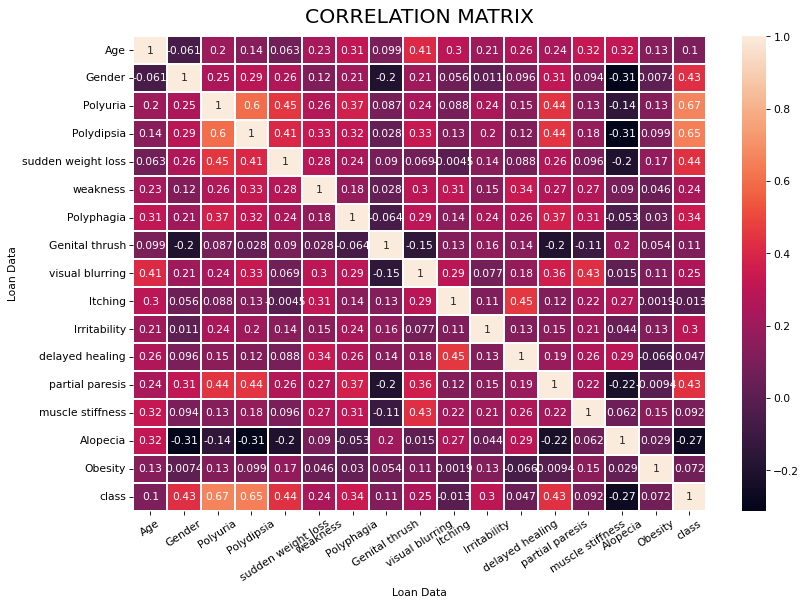

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(Correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Loan Data')
plt.ylabel('Loan Data')
plt.xticks(rotation=33)
plt.show()

#Visualization

/tmp/ipython-input-1687772904.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weakness', data=df, palette='viridis')


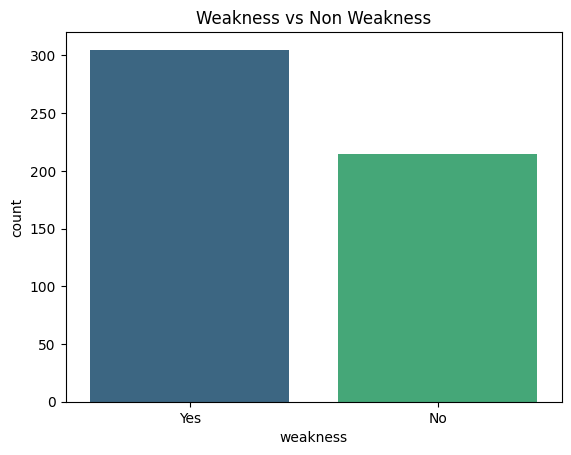

In [ ]:
sns.countplot(x='weakness', data=df, palette='viridis')
plt.title('Weakness vs Non Weakness')
plt.show()

In the histogram, Weakness has 300 values and Non-Weakness has 200 values.
Weakness is higher than Non-Weakness.

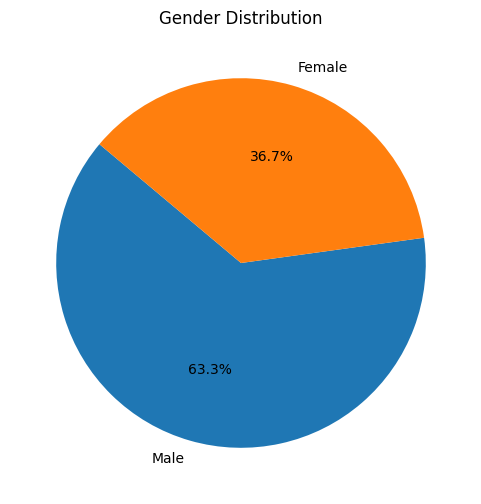

In [ ]:
gender_counts = df['Gender'].value_counts()
gender_counts

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Gender Distribution')

plt.show()

Here, 63.3% values are male and 36.7% values are female in the pie chart.

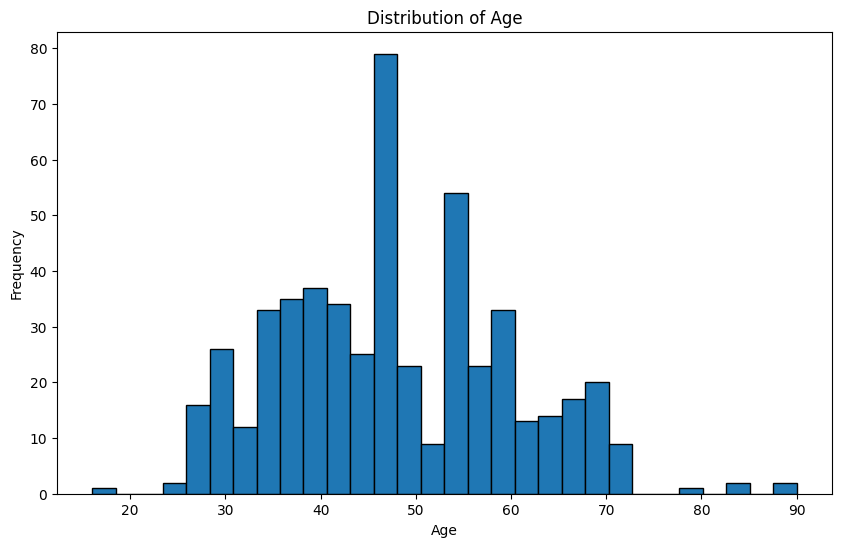

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_copy['Age'], bins=30, edgecolor='black')

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

#Process the data


In [ ]:
X = df_copy.drop(columns=['class'])
Y = df_copy['class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Run SVM

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0]


#Present the accuracy

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.8942307692307693
Precision: 0.9285714285714286
Recall (Sensitivity): 0.9154929577464789
F1-Score: 0.9219858156028369


#Confusion Matrix

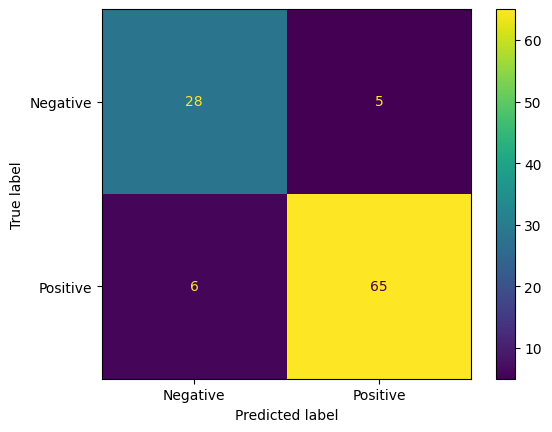

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Negative', 'Positive'])
cm_display.plot()
plt.show()